# TP 2 - Basile TERVER

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from scipy.stats import multivariate_normal
from matplotlib.colors import LogNorm
from sklearn import mixture

## Exercise 1

Let $n \in N$ and $X = \{x_1,\dots, x_n\}$ a set of $n$ distinct real numbers. 

Let $(p_i)_{i\in[1,\dots,n]}$ a sequence of real
numbers such that:
$$\forall i \in [1,\dots,n], p_i > 0 \textrm{ and } \sum_{i=1}^n p_i = 1.$$

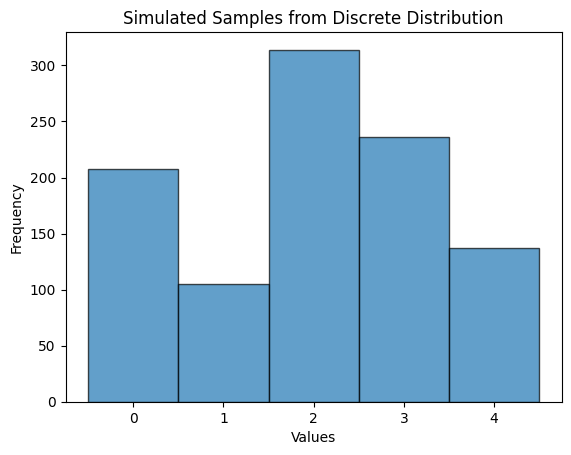

In [250]:
import numpy as np
import matplotlib.pyplot as plt

def discrete_distribution_sample(probabilities):
    """
    Generate a random sample from a discrete distribution using the inversion method.

    Parameters:
    - probabilities: List of probabilities for each possible value in the distribution.

    Returns:
    - Sampled value from the distribution.
    """
    u = np.random.uniform(0, 1)
    cumulative_prob = 0
    for i, prob in enumerate(probabilities):
        cumulative_prob += prob
        if u <= cumulative_prob:
            return i

# Parameters for the discrete distribution (replace with your own values)
n_values = 5  # Number of possible values in the distribution
probabilities = [0.2, 0.1, 0.3, 0.25, 0.15]  # Probability of each value

# Number of samples to generate
N = 1000

# Generate N samples using the inversion method
samples = [discrete_distribution_sample(probabilities) for _ in range(N)]

# Plot the histogram using numpy.histogram
plt.hist(samples, bins=np.arange(-0.5, n_values + 0.5, 1), edgecolor='black', alpha=0.7)
plt.xticks(range(n_values))
plt.title('Simulated Samples from Discrete Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


One can observe that the above empirical distribution for $N=1000$ samples closely matches the theoretical distribution $(p_0,p_1,p_2,p_3,p_4)=(0.2, 0.1, 0.3, 0.25, 0.15)$.

## Exercise 2

### Question 2

In [251]:
from matplotlib.patches import Ellipse

samples shape= (1000, 2)


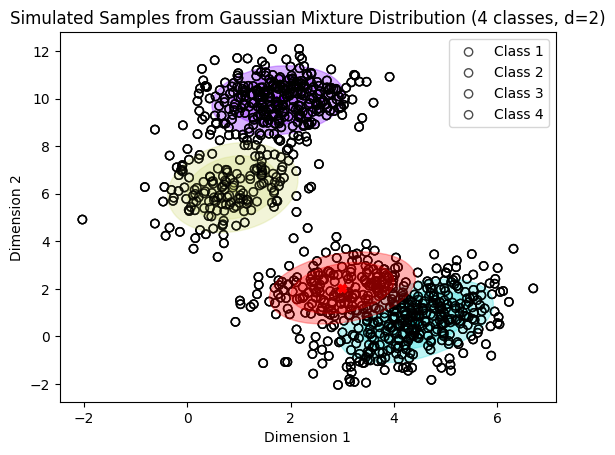

In [252]:
def generate_covariance_matrix():
    """
    Generate a random covariance matrix by sampling a random matrix X,
    computing X^T * X, and adding the identity matrix.

    Returns:
    - Covariance matrix.
    """
    random_matrix = np.random.rand(2, 2)
    covariance_matrix = np.dot(random_matrix.T, random_matrix) + np.eye(2)
    return covariance_matrix/2

def plot_ellipse(ax, mean, covariance, color):
    """
    Plot an ellipse representing the covariance matrix.

    Parameters:
    - ax: Matplotlib Axes object.
    - mean: Mean vector.
    - covariance: Covariance matrix.
    - color: Color of the ellipse.
    """
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

    for factor in [1.5, 3.0]:  # You can adjust the size of the ellipses
        width, height = 2 * np.sqrt(factor * eigenvalues)
        ell = Ellipse(xy=mean, width=width, height=height, angle=angle, color=color, alpha=0.3)
        ax.add_patch(ell)

def gaussian_mixture_sample(weights, means, covariances):
    """
    Generate a random sample from a Gaussian mixture distribution.

    Parameters:
    - weights: List of weights for each component of the mixture.
    - means: List of mean vectors for each component.
    - covariances: List of covariance matrices for each component.

    Returns:
    - Sampled point from the mixture distribution.
    """
    component = np.random.choice(len(weights), p=weights)
    sample = np.random.multivariate_normal(means[component], covariances[component])
    return sample

# Parameters for the Gaussian mixture distribution (replace with your own values)
num_classes = 4
weights = np.array(np.random.uniform(0.1, 0.3, num_classes))
weights /= np.sum(weights)  # Normalize weights to ensure they sum to 1
means = np.array([np.random.rand(2) * 10 for _ in range(num_classes)])  # Random mean vectors
covariances = np.array([generate_covariance_matrix() for _ in range(num_classes)])  # Generate covariance matrices
ground_truth_theta = {'mu':means, 'alpha':weights,'sigma':covariances}

# Number of samples to generate
N = 1000

# Generate N samples from the Gaussian mixture using the hierarchical model
samples = [gaussian_mixture_sample(weights, means, covariances) for _ in range(N)]
samples = np.array(samples)
print('samples shape=',samples.shape)

# Plot the samples
fig, ax = plt.subplots()

# Assign a unique color to each (center, ellipse) pair
color_cycle = plt.cm.rainbow(np.linspace(0, 1, num_classes))

for i in range(num_classes):
    color = color_cycle[i]
    label = f'Class {i + 1}'
    
    # Plot all samples with the same color
    ax.scatter(samples[:, 0], samples[:, 1], alpha=0.7, edgecolors='k', facecolors='none', label=label)

    # Plot the centers of the Gaussian distributions
    ax.scatter(means[i][0], means[i][1], color=color, marker='X')

    # Plot ellipses representing the covariance matrices
    plot_ellipse(ax, means[i], covariances[i], color=color)

ax.legend()
plt.title('Simulated Samples from Gaussian Mixture Distribution (4 classes, d=2)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

### Question 3

- Step E:
    Compute the probability of each observation generated from the Gaussian j :
    $$
        \tau_{i,j} = \frac{\alpha_j p(z_i=j|x_i, \mu_j, \Sigma_j)}{\sum_{k=1}^m \alpha_k p(z_i=k|x_i, \mu_k, \Sigma_k)}
    $$

 - Step M:
    Compute for each Gaussian $j$:
    $$
        \alpha_j = \frac{\sum_{i=1}^n\tau_{i,j}}{\sum_{k=1}^m\sum_{i=1}^n\tau_{i,k}}
    $$
    $$
        \mu_j = \frac{\sum_{i=1}^n\tau_{i,j}x_i}{\sum_{i=1}^n\tau_{i,j}}
    $$
    $$
        \Sigma_j = \frac{\sum_{i=1}^n\tau_{i,j}(x_i-\mu_j)(x_i-\mu_j)^T}{\sum_{i=1}^n\tau_{i,j}}
    $$

Notations:
- $\mu\in \R^{p\times d}$
- $\alpha\in(\R_+^*)^{p}$
- $\Sigma\in (S_d^{++}(\R))^p$
- $\tau\in\mathbb{R}^{n \times p}$
- $X \in\mathbb{R}^{n\times d}$ (from question above)


For computational efficiency purposes, we compute the $tau$ matrix as follows. Define $\tau_{ij}=\frac{\tilde{\tau}_{ij}}{\sum_k \tilde{\tau}_{ik}}$, that is $\tilde{\tau}_{ij} =p_{\theta}(x_i|Z_i=j)\alpha_j = \mathcal{N}(x_i|\mu_j,\Sigma_j)\alpha_j$. Thus we have
$$ \tilde{\tau}_{ij}= \frac{\alpha_j}{(2\pi)^{d/2}\sqrt{det(\Sigma_j)}} \exp\Bigl(-\frac{1}{2}(x_i-\mu_j)^\top A_j (x_i-\mu_j)\Bigr).
$$

We first compute the family $\log(\tilde{\tau}_{ij}),j\in \{1,\dots,p\},i\in\{1,\dots n\}$ with the explicit formula
$$ \log(\tilde{\tau}_{ij})=\log(\alpha_j) - \frac{d}{2}\log(2\pi)-\frac{1}{2}\log(det(\Sigma_j)) -\frac{1}{2}(x_i-\mu_j)^\top A_j (x_i-\mu_j).
$$
To compute the $\log(\tilde{\tau}_{ij}),j\in \{1,\dots,p\}$, the function should use np.linalg.slogdet for a term and np.linalg.pinv for another term. It should also regularise $\Sigma_j= \Sigma_j+10^{-4} Id$.

Then we compute $\log(\tau_{ij})=\log(\tilde{\tau}_{ij})-\log(\sum_k \tilde{\tau}_{ik})$ using the scipy.logsumexp function and finally compute $\tau$ taking the exponential.

In [253]:
import scipy as sp
from scipy.special import logsumexp 

In [254]:
## Step E : Compute tau
def compute_log_tau_tilde(X, theta):
    mu, sigma, alpha = theta['mu'], theta['sigma'], theta['alpha']
    d,n,p = len(mu[0]),len(X),len(mu)
    res = np.zeros((n,p))

    for j in range(p):
        for i in range(n):
            x = X[i]
            sigma_reg = sigma[j] + 1e-4 * np.eye(d)
            log_det_sigma = np.linalg.slogdet(sigma_reg)[1]
            inv_sigma =np.linalg.pinv(sigma_reg)
            log_alpha=np.log(alpha[j])
            #print('log_alpha shape=', log_alpha)
            #print('(x-mu[j]) shape=',(x-mu[j]).shape)
            diff_x_mu = (x - mu[j])[:, np.newaxis]
            #print('diff_x_mu shape after new dimension=',diff_x_mu.shape)
            #diff_x_mu = np.expand_dims(X[i]-mu[j], 1)
            #res[i,j] =log_alpha -0.5 * (log_det_sigma + (x-mu[j]).T @ inv_sigma @ (x-mu[j]))
            res[i,j] =log_alpha -0.5 * (d*np.log(2*np.pi)+ log_det_sigma + diff_x_mu.T @ inv_sigma @ diff_x_mu)

    return res

def compute_tau(X, theta):
    log_tau_tilde=compute_log_tau_tilde(X, theta)
    #on somme selon colonnes
    #print('log_tau_tilde shape:', log_tau_tilde.shape)
    #print('logsumexp shape:', logsumexp(log_tau_tilde, axis=1).shape)
    log_tau=log_tau_tilde-logsumexp(log_tau_tilde,axis=1)[:, np.newaxis]
    #print('log_tau shape=',log_tau.shape)
    return np.exp(log_tau)

## Step M 
def compute_new_theta(X, theta):
    tau = compute_tau(X, theta)
    p = len(theta['mu'])
    n = len(X)
    tau_js = np.sum(tau,axis=0)[:, np.newaxis]
    #print('tau_js shape=',tau_js.shape)
    
    new_alpha = np.zeros_like(theta['alpha'])
    for j in range(p):
        for i in range(n):
            new_alpha[j] += tau[i, j]
    new_alpha /= n
    
    new_mu = np.zeros_like(theta['mu'])
    for j in range(p):
        for i in range(n):
            new_mu[j] += tau[i,j]*X[i]
    #print('new_mu shape=',new_mu.shape)
    new_mu/=tau_js
        
    new_sigma =np.zeros_like(theta['sigma'])
    for j in range(p):
        for i in range(n):
            diff_x_mu = np.expand_dims(X[i]-new_mu[j], 1)
            new_sigma[j] += tau[i,j]*diff_x_mu@diff_x_mu.T
        new_sigma[j]/= tau_js[j]
            
    new_theta ={'alpha' : new_alpha,
                'mu' : new_mu,
                'sigma' : new_sigma}
    
    return new_theta

Let us now compute 
\begin{align*}
\log(p_{\theta}(x_1,\dots,x_n))&=\sum_{i=1}^n \log(p_{\theta}(x_i))=\sum_{i=1}^n \log(p_{\theta}(x_i)) \\
&= \sum_{i=1}^n \log\Bigl(\sum_{j=1}^p p_{\theta}(x_i|Z_i=j) \alpha_j\Bigr) = \sum_{i=1}^n \log\Bigl(\sum_{j=1}^p \tilde{\tau}_{ij}\Bigr),
\end{align*}
recalling that
$$ \tilde{\tau}_{ij}= \frac{\alpha_j}{(2\pi)^{d/2}\sqrt{det(\Sigma_j)}} \exp\Bigl(-\frac{1}{2}(x_i-\mu_j)^\top A_j (x_i-\mu_j)\Bigr).
$$

In [255]:
def compute_loglikelihood(X, theta):
    tau_tilde = np.exp(compute_log_tau_tilde(X, theta))
    p = len(theta['mu'])
    n = len(X)
    #print("n=",n)
    #print("p=",p)
    tau_tilde_is = np.sum(tau_tilde,axis=1)
    #print('tau_is shape=',tau_is.shape)
    log_tau_tilde_is=np.log(tau_tilde_is)
    return np.sum(log_tau_tilde_is)

### Test the model on the synthetic data of Question 2

In [256]:
## Initialize parameters randomly but scaling 'mu' with the samples's empirical mean
theta ={'alpha' : np.ones(num_classes)/num_classes,
        'mu' : np.random.rand(num_classes, 2)*2*np.mean(samples),
        'sigma' : np.stack([np.eye(2) for _ in range(num_classes)])}

In [257]:
loglikelihood = []
gt_likelihood = compute_loglikelihood(samples, ground_truth_theta)
for i in range(20):
    loglikelihood.append(compute_loglikelihood(samples, theta))
    theta = compute_new_theta(samples, theta)
#This outputs the learned theta after 20 iterations of the algorithm
# Don't forget to reinitilize theta with the above cell everytime you want to check the
# performance of the algorithm

C:\Users\terve\AppData\Local\Temp\ipykernel_33092\1648863455.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[i,j] =log_alpha -0.5 * (d*np.log(2*np.pi)+ log_det_sigma + diff_x_mu.T @ inv_sigma @ diff_x_mu)


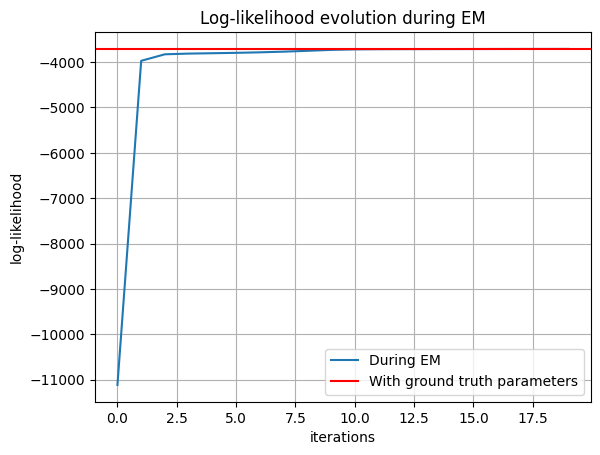

In [258]:
plt.plot(loglikelihood, label="During EM")
plt.axhline(gt_likelihood, c='red', label="With ground truth parameters")
plt.grid(True)
plt.xlabel("iterations")
plt.ylabel("log-likelihood")
plt.title("Log-likelihood evolution during EM")
plt.legend()

### Question 4

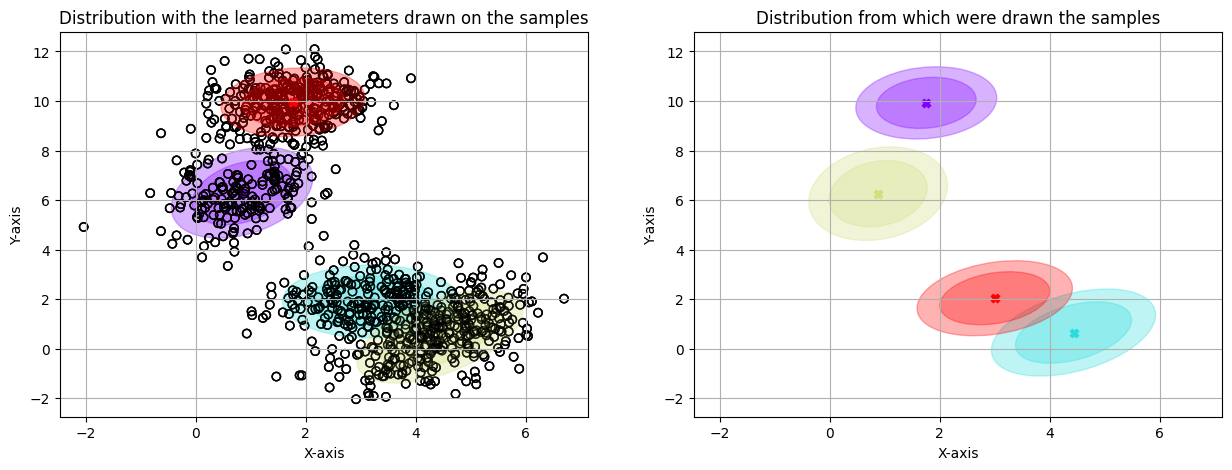

In [259]:
# Plot the samples
fig, ax = plt.subplots(1,2, figsize=(15, 5))

# Assign a unique color to each (center, ellipse) pair
color_cycle = plt.cm.rainbow(np.linspace(0, 1, num_classes))

for i in range(num_classes):
    color = color_cycle[i]
    label = f'Class {i + 1}'
    
    # Plot all samples with the same color
    ax[0].scatter(samples[:, 0], samples[:, 1], alpha=0.7, edgecolors='k', facecolors='none', label=label)

    # Plot the centers of the Gaussian distributions
    ax[0].scatter(theta['mu'][i][0], theta['mu'][i][1], color=color, marker='X')
    ax[1].scatter(means[i][0], means[i][1], color=color, marker='X')

    # Plot ellipses representing the covariance matrices
    plot_ellipse(ax[0], theta['mu'][i], theta['sigma'][i], color=color)
    plot_ellipse(ax[1], means[i], covariances[i], color=color)

ax[0].set_title('Distribution with the learned parameters drawn on the samples')
ax[0].set_xlabel('X-axis')
ax[0].set_ylabel('Y-axis')
ax[0].grid(True)

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_title('Distribution from which were drawn the samples')
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Y-axis')
ax[1].grid(True)

plt.show()

The above plot shows that the learned distributions are very close to the ground truth ones from which we generated the data.

### Question 5

In [203]:
df = pd.read_csv("data\WPP2019_Period_Indicators_Medium.csv")

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\terve\AppData\Local\Temp\ipykernel_33092\1444388811.py:1: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv("data\WPP2019_Period_Indicators_Medium.csv")


In [204]:
X = df[['CBR','CDR']]
print(X)
X=X.dropna()
print('X type =',type(X))
X=np.array(X)

X_normalized=np.zeros_like(X)
X_normalized[:, 0] = X[:, 0] / np.mean(X[:, 0])
X_normalized[:, 1] = X[:, 1] / np.mean(X[:, 1])

          CBR     CDR
0      50.314  36.862
1      50.998  33.718
2      51.477  30.808
3      51.646  28.223
4      51.234  25.495
...       ...     ...
14935  14.153   9.407
14936  13.429  10.001
14937  12.867  10.631
14938  12.492  11.191
14939  12.194  11.611

[14940 rows x 2 columns]
X type = <class 'pandas.core.frame.DataFrame'>


[]

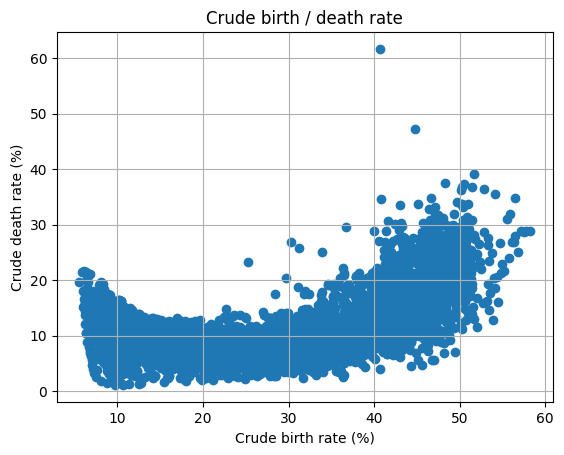

In [205]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Crude birth rate (%)')
plt.ylabel('Crude death rate (%)')
plt.title('Crude birth / death rate')
plt.grid(True)
plt.plot()

[]

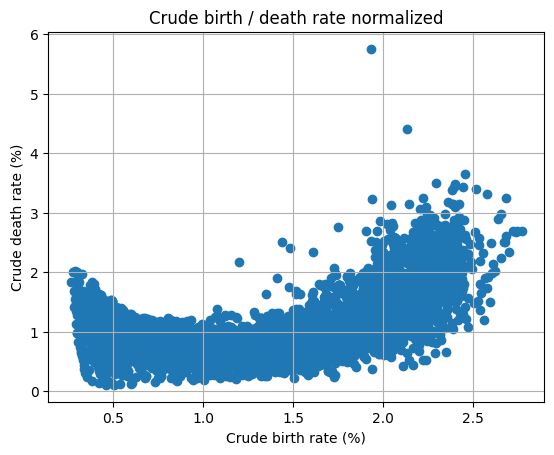

In [206]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1])
plt.xlabel('Crude birth rate (%)')
plt.ylabel('Crude death rate (%)')
plt.title('Crude birth / death rate normalized')
plt.grid(True)
plt.plot()

Each of the 14940 sample points correspond to a country and a 5-year period between 1950 and 2100. We should not have any particular structure in the entire dataset except a structure explain by 'socio-economic' factors. It seems that there are 3 clusters on this dataset, one on the left, one in the middle and one on the right (more sparse).

### Question 6

In [207]:
#Set the values of nb_clusters to try
max_nb_clusters=12
nb_clusters=[i for i in range(2,max_nb_clusters+1)]

#list of theta and likelihood for each value of nb_clusters
theta_list=[]
loglikelihood_list=[]

for i in tqdm(nb_clusters):
    loglikelihood_list.append([])
    #initialize randomly
    theta={'alpha' : np.ones(i)/i,
        'mu' : np.random.rand(i, 2)*2*np.mean(X),
        'sigma' : np.stack([np.eye(2) for _ in range(i)])}

    ## Implement EM to determine theta
    for k in range(14):
        loglikelihood_list[-1].append(compute_loglikelihood(X, theta))
        theta = compute_new_theta(X, theta)
    
    theta_list.append(theta)

  0%|          | 0/11 [00:00<?, ?it/s]C:\Users\terve\AppData\Local\Temp\ipykernel_33092\1648863455.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[i,j] =log_alpha -0.5 * (d*np.log(2*np.pi)+ log_det_sigma + diff_x_mu.T @ inv_sigma @ diff_x_mu)
C:\Users\terve\AppData\Local\Temp\ipykernel_33092\1426763558.py:9: RuntimeWarning: divide by zero encountered in log
  log_tau_tilde_is=np.log(tau_tilde_is)
100%|██████████| 11/11 [42:42<00:00, 232.94s/it]


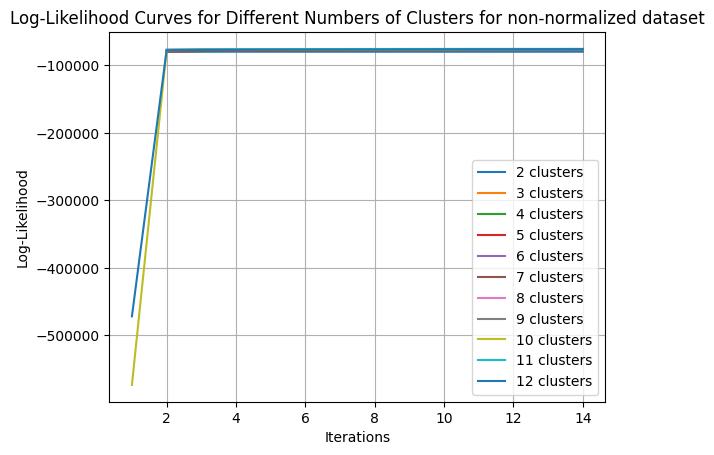

In [212]:
for i, clusters in enumerate(nb_clusters):
    plt.plot(range(1, 15), loglikelihood_list[i], label=f'{clusters} clusters')
plt.grid(True)
plt.title('Log-Likelihood Curves for Different Numbers of Clusters for non-normalized dataset')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.show()

In [221]:
#list of theta and likelihood for each value of nb_clusters
theta_list_normalized=[]
loglikelihood_list_normalized=[]

for i in tqdm(nb_clusters):
    loglikelihood_list_normalized.append([])
    #initialize randomly
    theta={'alpha' : np.ones(i)/i,
        'mu' : np.random.rand(i, 2)*2*np.mean(X_normalized),
        'sigma' : np.stack([np.eye(2) for _ in range(i)])}

    ## Implement EM to determine theta
    for k in range(14):
        loglikelihood_list_normalized[-1].append(compute_loglikelihood(X_normalized, theta))
        theta = compute_new_theta(X_normalized, theta)
    
    theta_list_normalized.append(theta)

  0%|          | 0/11 [00:00<?, ?it/s]C:\Users\terve\AppData\Local\Temp\ipykernel_33092\1648863455.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[i,j] =log_alpha -0.5 * (d*np.log(2*np.pi)+ log_det_sigma + diff_x_mu.T @ inv_sigma @ diff_x_mu)
100%|██████████| 11/11 [28:39<00:00, 156.35s/it]


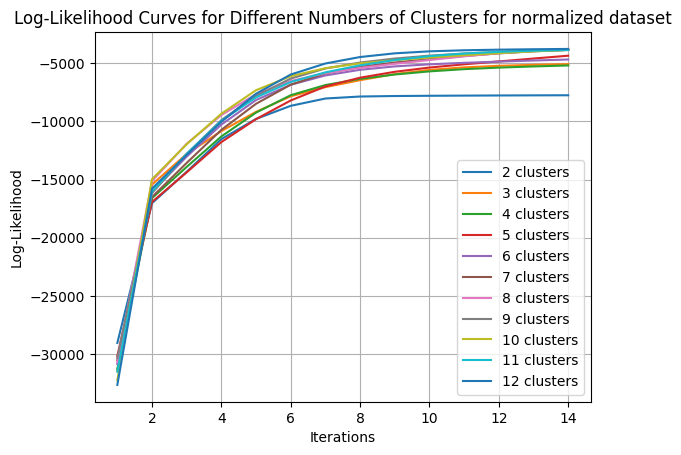

In [222]:
for i, clusters in enumerate(nb_clusters):
    plt.plot(range(1, 15), loglikelihood_list_normalized[i], label=f'{clusters} clusters')
plt.grid(True)
plt.title('Log-Likelihood Curves for Different Numbers of Clusters for normalized dataset')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.show()

We see that normalising the input dataset is essential for the EM algorithm to be efficient. This is due to our initialisation. This is also supported by the fact that each iteration takes about twice more time in the non-normalised case.

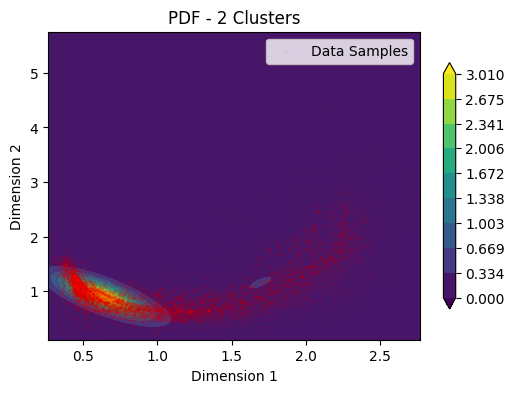

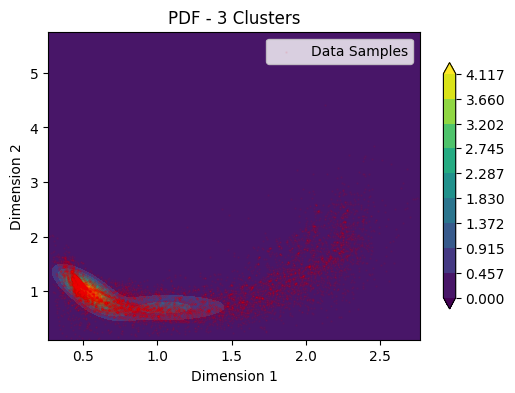

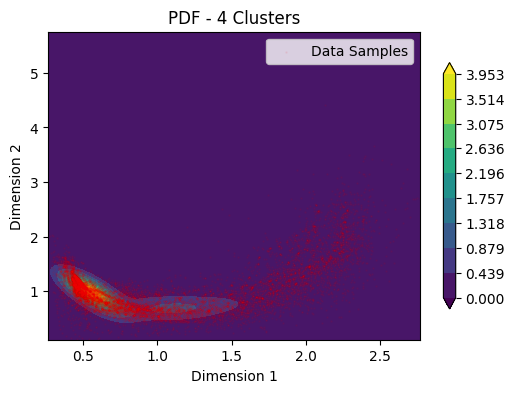

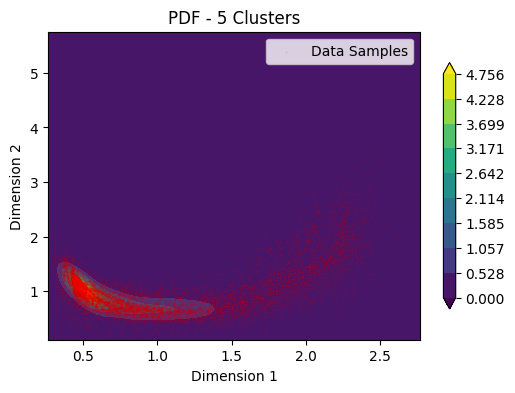

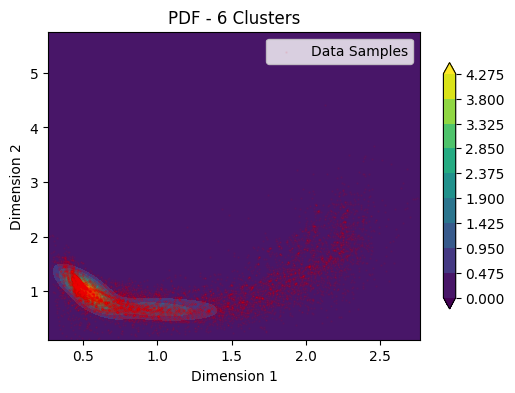

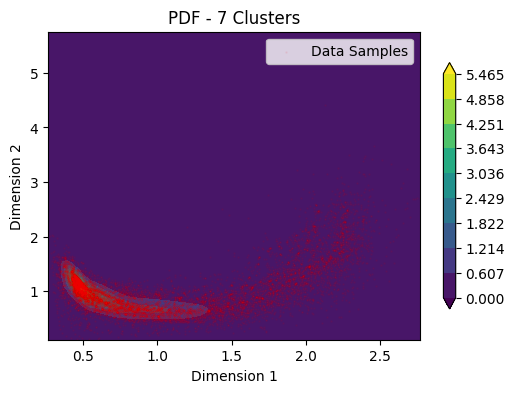

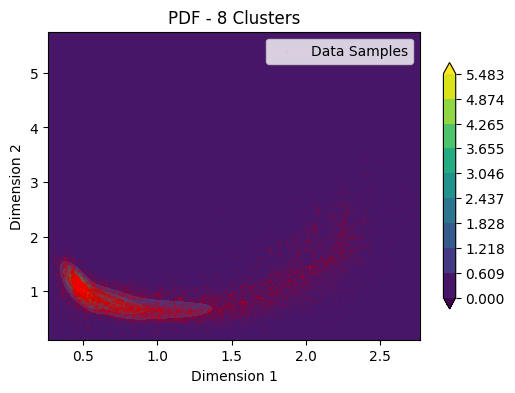

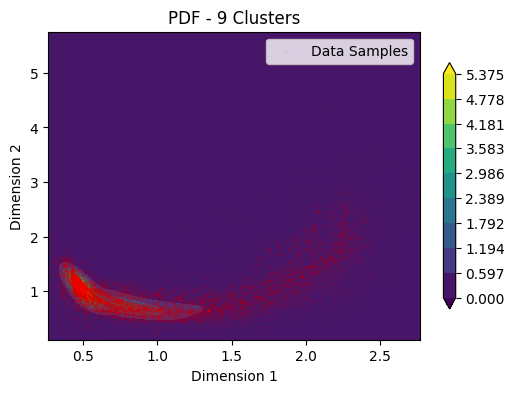

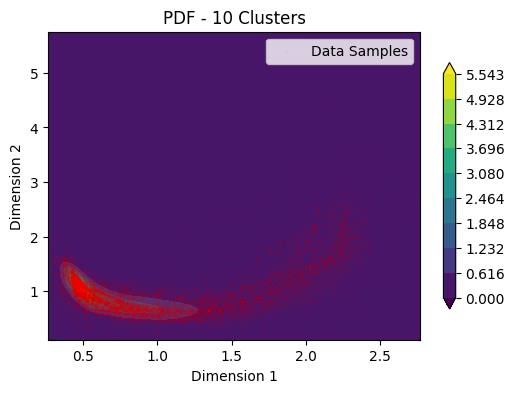

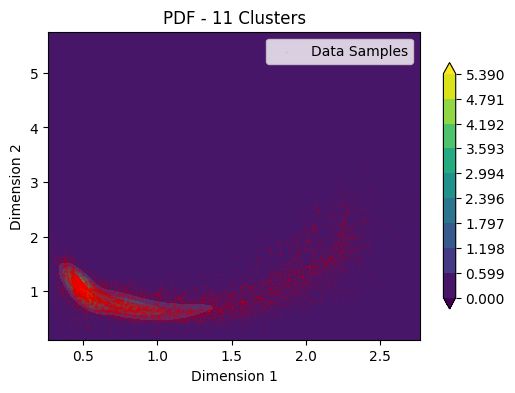

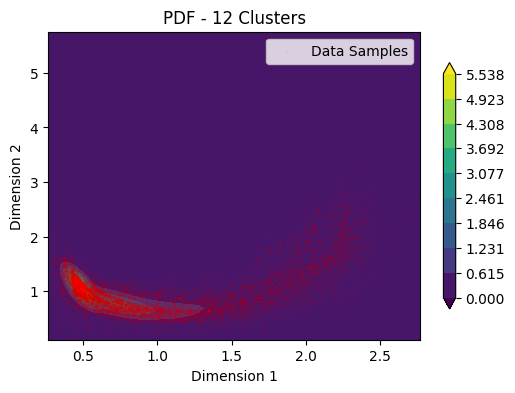

In [229]:
def gaussian_mixture_pdf(x, theta):
    num_classes = len(theta['mu'])
    pdf_values = np.zeros(len(x))

    for j in range(num_classes):
        mu = theta['mu'][j]
        sigma = theta['sigma'][j]
        alpha = theta['alpha'][j]
        pdf_values += alpha * multivariate_normal.pdf(x, mean=mu, cov=sigma, allow_singular=True)

    return pdf_values

def plot_gmm(X, theta, title="Negative log-likelihood predicted by a GMM"):
    x_range = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_range = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)
    points = np.column_stack((X_grid.ravel(), Y_grid.ravel()))

    pdf_values = gaussian_mixture_pdf(points, theta)
    pdf_values = pdf_values.reshape(X_grid.shape)

    levels = np.linspace(0, np.max(pdf_values), 10)
    CS = plt.contourf(X_grid, Y_grid, pdf_values, levels=levels, cmap='viridis', extend='both')
    CB = plt.colorbar(CS, shrink=0.8)
    plt.scatter(X[:, 0], X[:, 1], 0.8, color='red', label='Data Samples',alpha=0.05)

    plt.title(title)
    plt.axis("tight")
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()

# Plot using the function for each set of parameters
for i, theta in enumerate(theta_list_normalized):
    plt.figure(figsize=(6, 4))
    plot_gmm(X_normalized, theta, title=f'PDF - {len(theta["mu"])} Clusters')
    plt.show()


Here is another type of plot of the pdf using level lines (instead of color scale) and a log-scale.

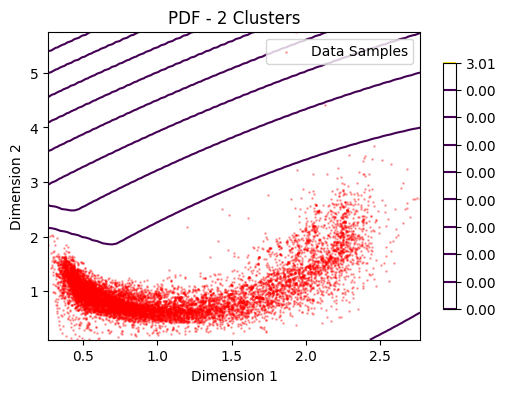

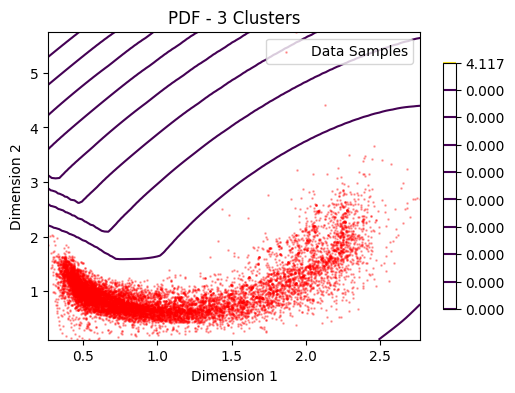

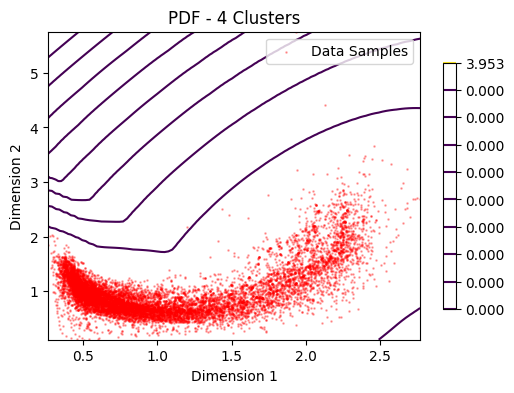

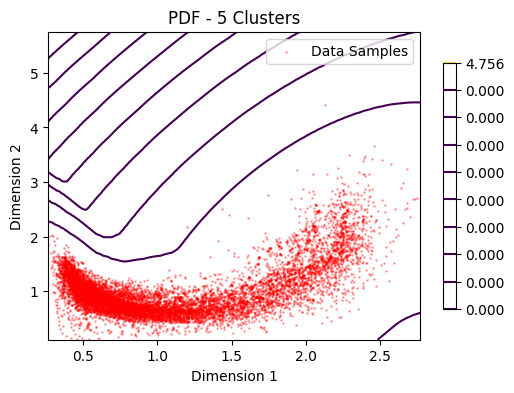

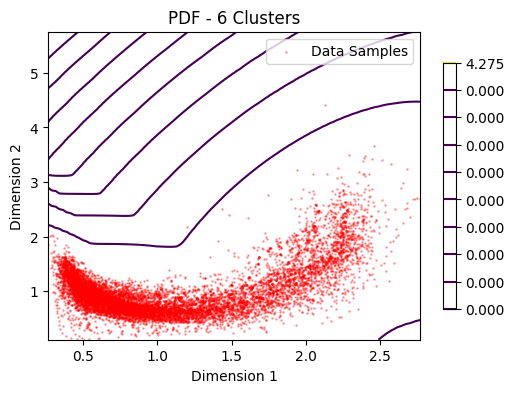

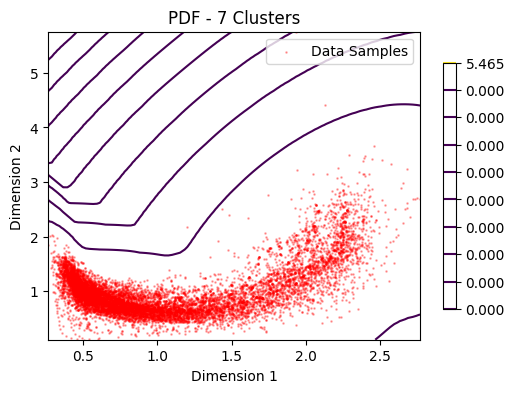

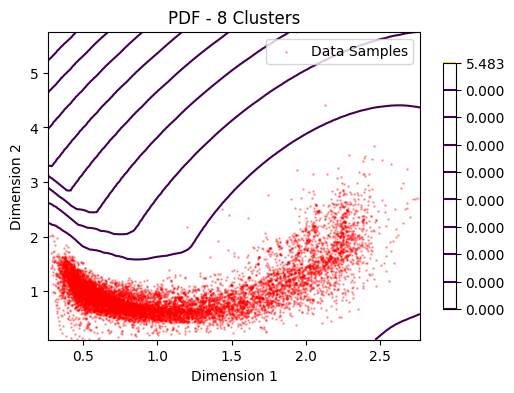

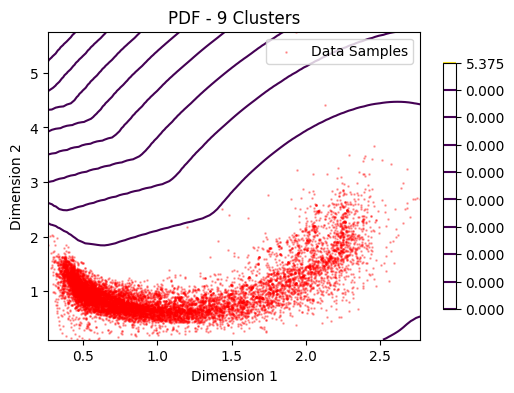

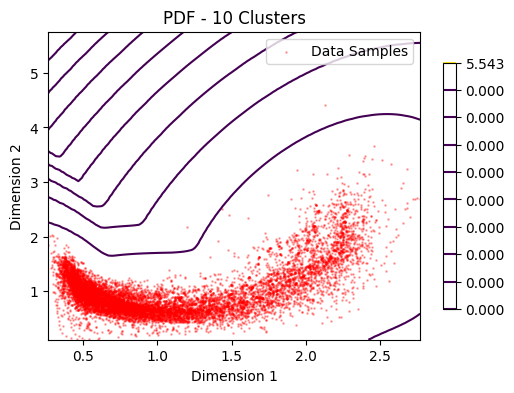

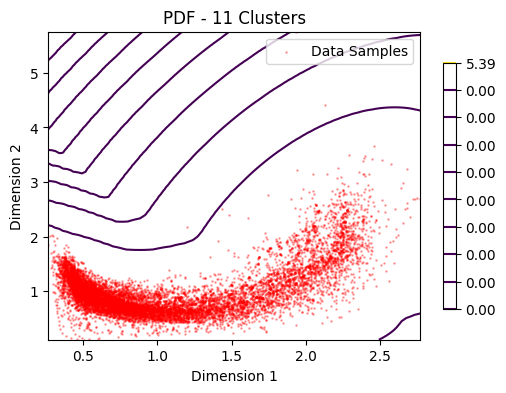

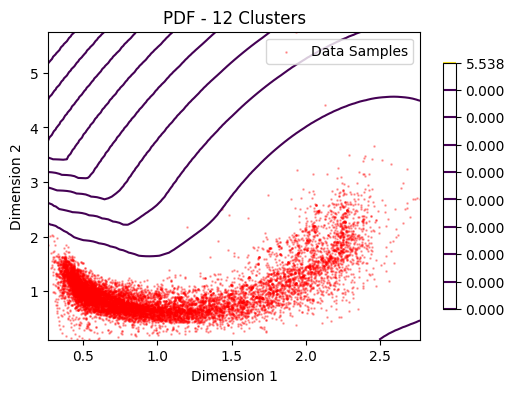

In [230]:
def plot_gmm(X, theta, title="Negative log-likelihood predicted by a GMM"):
    x_range = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_range = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)
    points = np.column_stack((X_grid.ravel(), Y_grid.ravel()))

    pdf_values = gaussian_mixture_pdf(points, theta)
    pdf_values = pdf_values.reshape(X_grid.shape)

    # Use log scale for more color variation
    levels = np.logspace(np.log10(np.min(pdf_values)), np.log10(np.max(pdf_values)), 10)
    
    # Plot contours with level lines
    CS = plt.contour(X_grid, Y_grid, pdf_values, levels=levels, cmap='viridis')

    # Use alpha to control the transparency of data points
    plt.scatter(X[:, 0], X[:, 1], 0.8, color='red', label='Data Samples', alpha=0.3)

    CB = plt.colorbar(CS, shrink=0.8)
    
    plt.title(title)
    plt.axis("tight")
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()

# Plot using the function for each set of parameters
for i, theta in enumerate(theta_list_normalized):
    plt.figure(figsize=(6, 4))
    plot_gmm(X_normalized, theta, title=f'PDF - {len(theta["mu"])} Clusters')
    plt.show()


The number of degrees of freedom $df(p)$ of the mixture model with $p$ clusters in dimension $d$ is $dp$ for the means, the $p$ weights of the gaussians and for each (symmetric) covariance matrix $\frac{d^2-d}{2}+d=d(\frac{d-1}{2}+1)=d(d+1)/2$, therefore the number of parameters to learn is
$$  df(p)= p\Bigl(\frac{d(d+1)}{2}+d+1 \Bigr) = p(d+1)\Bigl(\frac{d}{2}+1 \Bigr)
$$

C:\Users\terve\AppData\Local\Temp\ipykernel_33092\1648863455.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[i,j] =log_alpha -0.5 * (d*np.log(2*np.pi)+ log_det_sigma + diff_x_mu.T @ inv_sigma @ diff_x_mu)


optimal number of clusters among [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] is 7


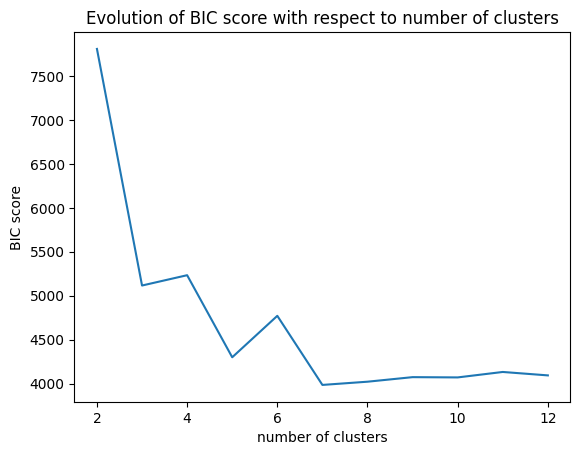

In [233]:
#compute the BIC objective function for a given theta (thus for a given nb of clusters)
def BIC(X,theta):
    mu = theta['mu']
    sigma = theta['sigma']
    alpha = theta['alpha']
    d,n,p = len(mu[0]),len(X),len(mu)
    log_likelihood=compute_loglikelihood(X,theta)
    degrees_of_freedom=p*(d+1)*(d/2.0+1)
    return -log_likelihood+(degrees_of_freedom*np.log(n))/2.0

BIC_list = np.array([BIC(X_normalized,theta) for theta in theta_list_normalized])

print(f'optimal number of clusters among {nb_clusters} is',np.argmin(BIC_list)+2)

plt.plot(nb_clusters,BIC_list)
plt.xlabel('number of clusters')
plt.ylabel('BIC score')
plt.title('Evolution of BIC score with respect to number of clusters')
plt.show()

The optimal number of clusters, that is the one with smaller BIC score is $p=7$.The BIC score seems to reach a plateau after this value.

## Exercise 3

### Question 1

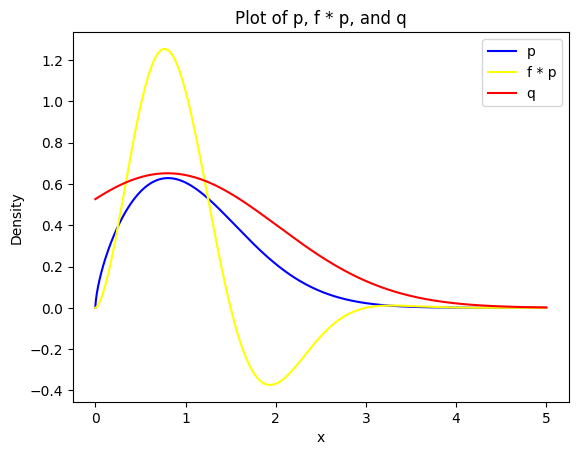

In [260]:
# Define the functions p(x), q(x), and f(x)
def p(x):
    if np.any(x < 0):
        raise ValueError("p(x) is not defined for x < 0")
    return np.abs(x)**0.65 * np.exp(-x**2 / 2)

def q(x, mu=0.8):
    return 2 / np.sqrt(2 * np.pi * 1.5) * np.exp(-((mu - x)**2) / (2 * 1.5))

def f(x):
    if np.any(x < 0):
        raise ValueError("f(x) is not defined for x < 0")
    return 2 * np.sin((2 * np.pi / 3) * x)


# Function to calculate importance weights
def calculate_weights(x_values):
    return p(x_values) / q(x_values)

# Importance sampling procedure
def importance_sampling(n_samples):
    # Sample from q(x)
    samples_q = np.random.normal(0.8, 1.5, n_samples)

    # Filter out negative samples
    valid_samples = samples_q[samples_q >= 0]

    # Raise an error if there are no valid samples
    if len(valid_samples) == 0:
        raise ValueError("No valid samples to compute importance sampling")

    # Calculate importance weights
    weights = calculate_weights(valid_samples)

    # Normalize weights
    weights /= np.sum(weights)

    # Estimate the expectation using importance weights and the function f(x)
    expectation_estimate = np.mean(weights * f(valid_samples))

    return expectation_estimate

# Plotting
x_values = np.linspace(0, 5, 1000)  # Adjust the range as needed

plt.plot(x_values, p(x_values), label='p', color='blue')
plt.plot(x_values, f(x_values) * p(x_values), label='f * p', color='yellow')
plt.plot(x_values, q(x_values), label='q', color='red')

plt.title('Plot of p, f * p, and q')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

### Question 2

In [261]:
# Sample sizes to test
sample_sizes = [10, 100, 1000, 10000]

# Run importance sampling for each sample size
for n_samples in sample_sizes:
    estimates = []
    for _ in range(100):  # Run the procedure 100 times for each sample size
        try:
            estimate = importance_sampling(n_samples)
            estimates.append(estimate)
        except ValueError as e:
            print(f"Sample Size: {n_samples}, Error: {e}")

    if len(estimates) > 0:
        mean_estimate = np.mean(estimates)
        variance_estimate = np.var(estimates)

        print(f"Sample Size: {n_samples}, Mean Estimate: {mean_estimate}, Variance Estimate: {variance_estimate}")

Sample Size: 10, Mean Estimate: 0.09937805906894391, Variance Estimate: 0.01079212876898064
Sample Size: 100, Mean Estimate: 0.009772048282621138, Variance Estimate: 5.568612230151451e-06
Sample Size: 1000, Mean Estimate: 0.0009621658530209896, Variance Estimate: 5.270704036361405e-09
Sample Size: 10000, Mean Estimate: 9.729407901687396e-05, Variance Estimate: 4.910658179082515e-12


### Question 3


=== mu = 0.8 ===
Sample Size: 10, Mean Estimate: -0.11591550316397055, Std Estimate: 0.18122268769640326
Sample Size: 100, Mean Estimate: 0.012115820374201018, Std Estimate: 0.022152882199066484
Sample Size: 1000, Mean Estimate: 0.0010351864082528103, Std Estimate: 0.002139224529898082
Sample Size: 10000, Mean Estimate: 9.828183026528327e-05, Std Estimate: 0.00021664083861423086

=== mu = 6 ===
Sample Size: 10, Mean Estimate: 0.1838448161746751, Std Estimate: 0.371925497021019
Sample Size: 100, Mean Estimate: -0.016006375586518573, Std Estimate: 0.15339336619062094
Sample Size: 1000, Mean Estimate: 0.0008766178491406944, Std Estimate: 0.021925794611624107
Sample Size: 10000, Mean Estimate: 0.00012574152687129154, Std Estimate: 0.005870917397047446


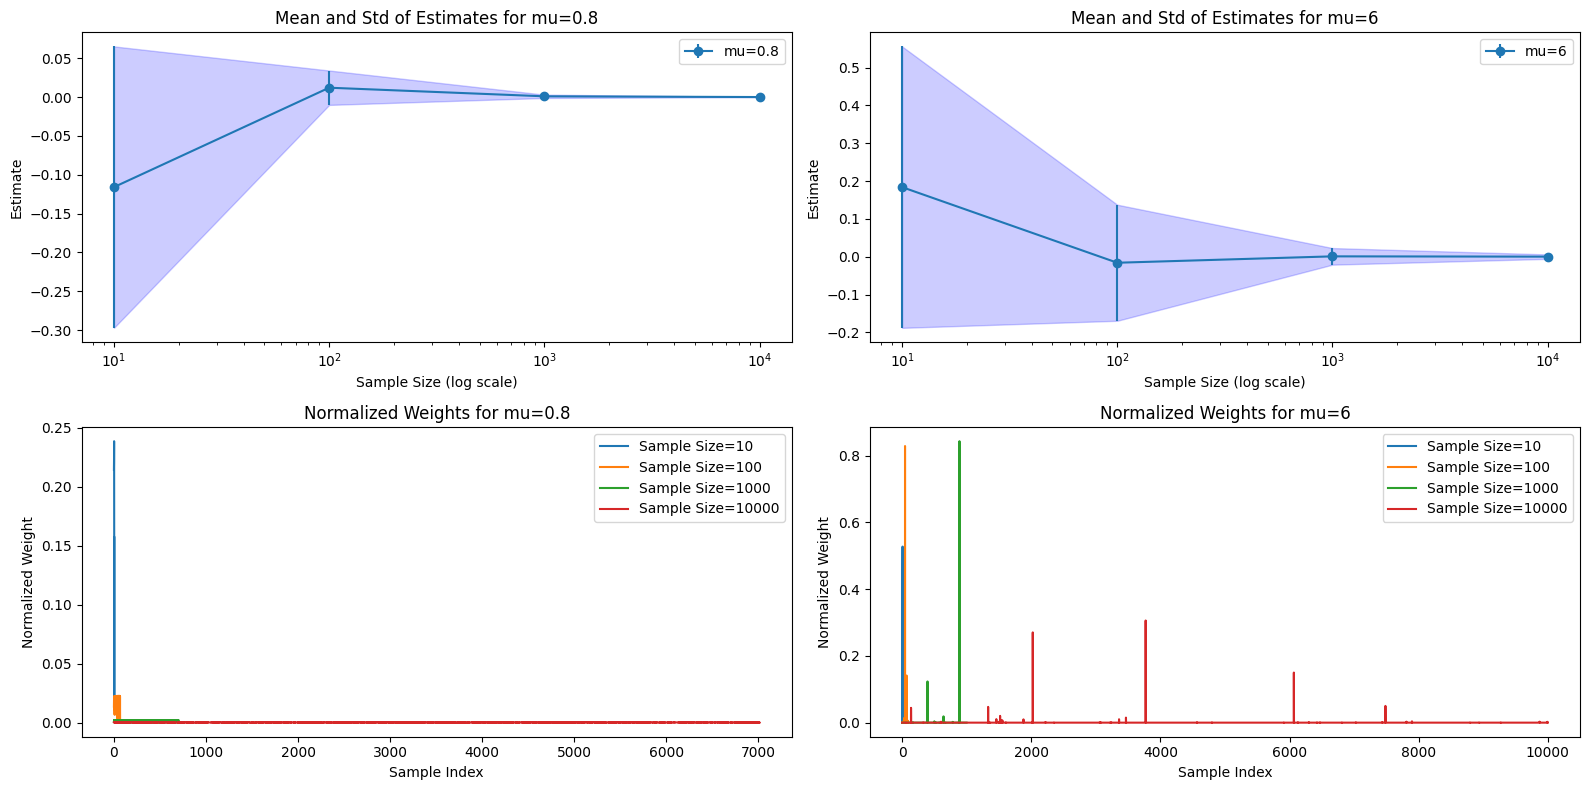

In [262]:
# Function to calculate importance weights
def calculate_weights(x_values, mu=0.8):
    return p(x_values) / q(x_values, mu)

# Importance sampling procedure
def importance_sampling(n_samples, mu=0.8):
    # Sample from q(x) and ensure only positive samples
    samples_q = np.random.normal(mu, 1.5, n_samples)
    samples_q = samples_q[samples_q >= 0]  # Filter out negative samples

    # Raise an error if there are no valid samples
    if len(samples_q) == 0:
        raise ValueError("No valid samples to compute importance sampling")

    # Calculate importance weights
    weights = calculate_weights(samples_q, mu)

    # Normalize weights
    weights /= np.sum(weights)

    # Estimate the expectation using importance weights and the function f(x)
    expectation_estimate = np.mean(weights * f(samples_q))
    std_estimate = np.std(weights * f(samples_q))

    return expectation_estimate, std_estimate, weights

# Sample sizes to test
sample_sizes = [10, 100, 1000, 10000]

# Values of mu
mu_values = [0.8, 6]

# Lists to store results
mean_estimates = []
std_estimates = []
weights_list = []

# Run importance sampling for each mu and sample size
for mu in mu_values:
    print(f"\n=== mu = {mu} ===")
    mean_estimates_mu = []
    std_estimates_mu = []
    weights_mu_list = []

    for n_samples in sample_sizes:
        try:
            mean_estimate, std_estimate, weights = importance_sampling(n_samples, mu)
            mean_estimates_mu.append(mean_estimate)
            std_estimates_mu.append(std_estimate)
            weights_mu_list.append(weights)
            print(f"Sample Size: {n_samples}, Mean Estimate: {mean_estimate}, Std Estimate: {std_estimate}")
        except ValueError as e:
            print(f"Sample Size: {n_samples}, Error: {e}")

    mean_estimates.append(mean_estimates_mu)
    std_estimates.append(std_estimates_mu)
    weights_list.append(weights_mu_list)

# Plotting
plt.figure(figsize=(16, 8))

# Plot mean and std of estimates with shaded error regions
for i, mu in enumerate(mu_values):
    plt.subplot(2, 2, i + 1)
    plt.errorbar(sample_sizes, mean_estimates[i], yerr=std_estimates[i], label=f'mu={mu}', marker='o')
    plt.fill_between(sample_sizes, np.array(mean_estimates[i]) - np.array(std_estimates[i]),
                     np.array(mean_estimates[i]) + np.array(std_estimates[i]), color='blue', alpha=0.2)
    plt.xscale('log')
    plt.title(f'Mean and Std of Estimates for mu={mu}')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Estimate')
    plt.legend()

# Plot normalized weights
for i, mu in enumerate(mu_values):
    plt.subplot(2, 2, i + 3)
    for j, n_samples in enumerate(sample_sizes):
        plt.plot(weights_list[i][j], label=f'Sample Size={n_samples}')
    plt.title(f'Normalized Weights for mu={mu}')
    plt.xlabel('Sample Index')
    plt.ylabel('Normalized Weight')
    plt.legend()

plt.tight_layout()
plt.show()


In the case $\mu=6$, the importance weights have much more outliers than for $\mu=0.8$. 

Mean and std of estimates: the standard deviation of the estimates is much higher in the case $\mu=6$ because we more often have $p(x)\geq \gamma q(x)$, which corresponds to the outliers in the importance weights.
The fundamental equality $\mathbb{E}_p[f(X)]=\mathbb{E}_q[f(X)\frac{p(X)}{q(X)}]$ holds if $Supp(f\times p)\subseteq Supp(q)$. This equality justifies our empirical estimator but the assumption is not "really true" in the case $\mu=6$ since $Supp(f\times p)$ is more in the distribution tail of $q$ than in its center of mass, which explains the worse performance with $\mu=6$.

We also observe that there are much less samples available (around 7000) for $\mu=0.8$ because it is much more probable to have negative samples from $q$, and these samples are discarded.

To conclude, naive importance sampling is strongly dependent on the law $q$ according to which the data are generated: it must not be too different from the target distribution $p$.

Question 4 is handwritten, in the pdf.

### Question 5

In [334]:
#Parameter values
sigma_nu = 1
d = 5
b = 0.4
N = 10000

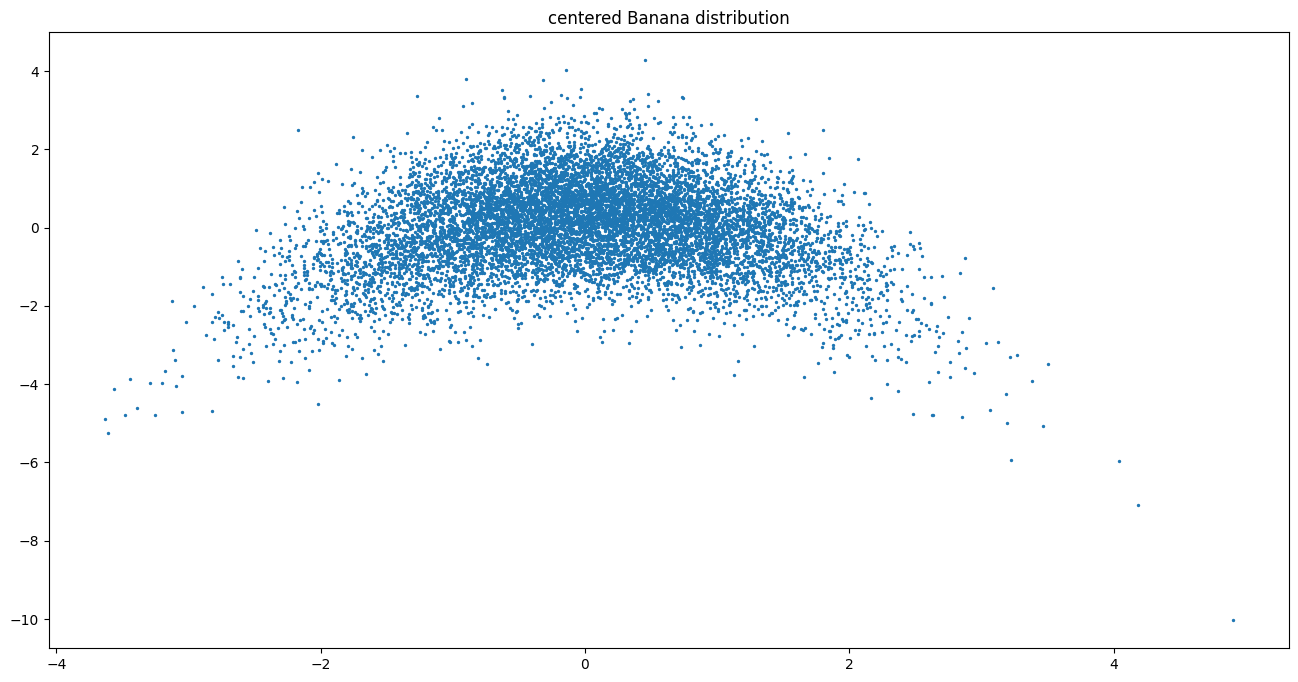

In [335]:
#Compute values of nu(x) for each sample x
def nu(X, sigma, d, b):
    Sigma = np.eye(d)
    Sigma[0, 0] = sigma**2
    X = np.array(X)
    Y = X.copy()
    Y[:, 1] += b*(Y[:, 0]**2 - sigma**2)

    pdf_values = multivariate_normal.pdf(Y, mean=np.zeros(d), cov=Sigma)
    return pdf_values

#generate the sampke using
def Banana(d, sigma, b , N):
    Sigma = np.eye(d)
    Sigma[0,0] = sigma**2

    X = np.random.multivariate_normal(np.zeros(d), Sigma, size = N)
    X[:,1] -= b*(X[:,0]**2 - sigma**2)

    return X

#Plot projection on two first coordinates of the banana distribution
X = Banana(d, sigma_nu, b , N)
plt.figure(figsize=(16, 8))
plt.scatter(X[:,0], X[:,1], s = 2)
plt.title("centered Banana distribution")
plt.show()

In [336]:
#Parameters (arbitrary)
nb_iter_EM=20
nb_iter_PMC=15

Visually, to "cover" a banana by gaussians, 3 gaussians should suffice (5 would be even more precise).

In [337]:
#Number of clusters
K=3

Let us now provide much more concise code than in Exercise 2 to perform EM. Instead of doing explictly the computation of $\tilde{\tau}$ we use multivariate_normal.pdf.

In [364]:
def EM_for_PMC(w, X, theta, Niter):

    X = np.array(X)
    N, d = X.shape

    #Will contain "last" estimator of theta
    alphas,mus,sigmas = theta['alpha'], theta['mu'],theta['sigma']
    
    #will contain the log-likelihoods over iterations
    log_likelihoods = []

    for iter in range(Niter):
        #E-step 
        tau = np.zeros((N,K)) 
        for j in range(K):
            tau[:,j] = alphas[j]*multivariate_normal.pdf(X, mus[j], sigmas[j,:,:])

        normalizer = np.sum(tau, axis = 1)

        #not used but could be
        log_likelihoods.append(w.T @ np.log(normalizer))

        for j in range(K):
            tau[:,j] /= normalizer

        #M-step
        #print("w shape=",w.shape)
        Wtau = w.T @ tau 
        bigW = np.repeat(w, K).reshape(N,K)
        weighted_tau = tau*bigW

        alphas = Wtau/np.sum(w)
        mus = weighted_tau.T @ X/Wtau[:,None]
        for k in range(K):
            sigmas[k,:,:] = np.sum([weighted_tau[n,k]*np.outer(X[n]-mus[k], X[n]-mus[k]) for n in range(N)], axis = 0)/Wtau[k]

    return log_likelihoods, alphas, mus, sigmas



In [370]:
def PMC(theta, n, Niter):

    #Initialization
    alpha,mu,sigma = theta['alpha'], theta['mu'],theta['sigma']

    for iter in range(Niter):
        # Generate n samples from the Gaussian mixture using the hierarchical model
        X = [gaussian_mixture_sample(alpha,mu,sigma) for _ in range(n)]
        X = np.array(X)
        #print('X shape=',X.shape)

        #Computation of the weights of step (iii) of PMC
        q_X = gaussian_mixture_pdf(X, theta) 
        w = nu(X, sigma_nu, d, b)/q_X 
        w = w/np.mean(w)

        #Update parameters with EM
        _, alpha, mu, sigma = EM_for_PMC(w, X, theta, Niter = nb_iter_EM)
        theta['alpha'], theta['mu'],theta['sigma']=alpha,mu,sigma

    return X, alpha, mu, sigma


In [371]:
n_samples_wanted = 10000

## Initialize parameters randomly but scaling 'mu' with the samples's empirical mean
theta_init ={'alpha' : (np.ones(K)/K),
        'mu' : np.random.randn(K, d),
        'sigma' : np.stack([np.eye(d) for _ in range(K)])}

print('alpha_init shape=',theta_init['alpha'].shape)
print('mu_init shape=',theta_init['mu'].shape)
print('sigma_init shape=',theta_init['sigma'].shape)

X, alpha, mu, sigma = PMC(theta_init, n_samples_wanted, nb_iter_PMC)

alpha_init shape= (3,)
mu_init shape= (3, 5)
sigma_init shape= (3, 5, 5)


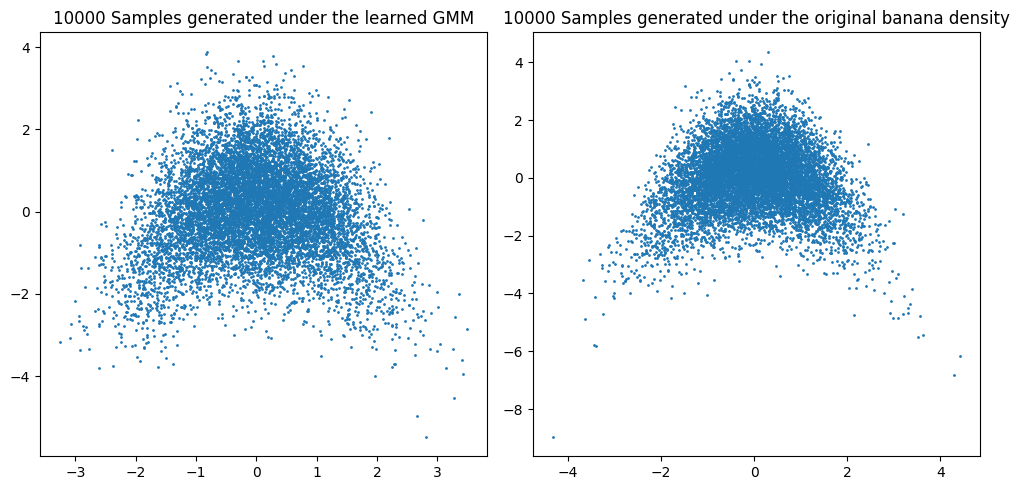

In [376]:
X = np.array(X)
Y = Banana(d, sigma_nu, b , N)
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], s = 1)
plt.title("{} Samples generated under the learned GMM".format(n))
plt.subplot(1,2,2)
plt.scatter(Y[:,0], Y[:,1], s = 1)
plt.title("{} Samples generated under the original banana density".format(Y.shape[0]))
plt.tight_layout()
plt.show()

The learned GMM that best approximates the banana density is satisfying. It is a bit too sparse at the center of the banana. One could plot the KL-divergence between the two densities over the iterations of the Population Monte-Carlo algorithm to see how it decreases.